# Sesi 9 Descriptive Statistics

## Calculating Descriptive Statistics

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [5]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [6]:
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [7]:
print(z_with_nan)

0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures with Central Tendency

In [9]:
mean_ = sum(x) / len(x) # Rumus manual
mean_

8.7

In [13]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [14]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [16]:
mean_ = np.mean(y) # Jika menggunakan NumPy
mean_

8.7

In [17]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [18]:
np.nanmean(y_with_nan) # Untuk meng ignore nan pada data

8.7

In [19]:
mean_ = z.mean() # Menggunakan pandas
mean_

8.7

In [20]:
z_with_nan.mean() # pandas akan otomatis mengignore nan

8.7

### Weigthed Mean

In [21]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [27]:
# Rumus manual di Python

x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [29]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w) # NumPY
print(wmean)

wmean = np.average(z, weights=w) # Pandas
print(wmean)

6.95
6.95


In [30]:
(w * y).sum() / w.sum()

6.95

### Harmonic Mean

In [31]:
hmean = len(x) / sum(1 / item for item in x) # Manual Python
hmean

2.7613412228796843

In [32]:
hmean = statistics.harmonic_mean(x) # Statistics
hmean

2.7613412228796843

In [33]:
scipy.stats.hmean(y) # Scipy

2.7613412228796843

In [34]:
scipy.stats.hmean(z)

2.7613412228796843

### Geometric Mean

In [37]:
gmean = 1 # Manual dengan Python, fungsinya untuk menghasilkan nilai panjang sisi persegi 

for item in x:
    gmean *= item
    
gmean **= 1 / len(x)
gmean

4.677885674856041

In [38]:
scipy.stats.gmean(y) # Menggunakan Scipy

4.67788567485604

In [39]:
scipy.stats.gmean(z)

4.67788567485604

### Median

In [44]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_prd[index])
    
median_

4

In [42]:
x

[8.0, 1, 2.5, 4, 28.0]

In [43]:
statistics.median_low(x[:-1])

2.5

In [45]:
statistics.median_high(x[:-1])

4

In [48]:
print(x_with_nan) # Menghitungkan nan sebagai data
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

[8.0, 1, 2.5, nan, 4, 28.0]
6.0
4
8.0


In [51]:
print(y)
median_ = np.median(y)
print(median_)

[ 8.   1.   2.5  4.  28. ]
4.0


In [50]:
median_ = np.median(y[:-1])
print(median_)

3.25


### Mode

In [55]:
u = [ 2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [57]:
mode_ = statistics.mode(u)
mode_

2

In [58]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [60]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [61]:
# Menggunakan NumPy
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [62]:
# Menggunakan Pandas, otomatis mengignore nan
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measures of Variability

In [65]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [66]:
var_= statistics.variance(x)
var_

123.2

In [67]:
var_ = np.var(y, ddof = 1)
var_

123.19999999999999

In [70]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [71]:
# Pandas, ignore nan secara default
z.var(ddof=1)

123.19999999999999

### Standard Deviation

In [72]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [73]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [74]:
# Menggunakan numpy
np.std(y, ddof=1)

11.099549540409285

In [75]:
y.std(ddof=1)

11.099549540409285

In [76]:
z.std(ddof=1)

11.099549540409285

### Skewness

In [79]:
# Manual dengan python
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x)/ (n-1)
std_ = var_** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

In [80]:
skew_

1.9470432273905929

In [81]:
# Menggunakan numpy
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [82]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [83]:
# Menggunakan pandas
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [84]:
z_with_nan.skew()

1.9470432273905924

## Percentiles

In [86]:
# Menggunakan numpy
y = np.array(x)

In [87]:
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [88]:
np.percentile(y, 5)

1.3

In [89]:
np.percentile(y, 95)

23.999999999999996

In [90]:
np.percentile(y, 50) # sama seperti median

4.0

In [91]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
y = np.array(x)

In [92]:
np.percentile(y, [25, 50, 75]) # Bisa langsung beberapa percentile

array([ 0.1,  8. , 21. ])

In [93]:
np.median(y)

8.0

In [94]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [95]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [97]:
#  Menggunakan pandas
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
                                        
z.quantile(0.95)

34.919999999999995

In [98]:
z.quantile([0.25, 0.50, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [99]:
z_with_nan.quantile([0.25, 0.50, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Range

In [100]:
np.ptp(y)

46.0

In [101]:
np.ptp(z)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


46.0

In [103]:
y.max() - y.min() # Secara manual

46.0

## Interquartile range

In [104]:
quartiles = np.quantile(y, [0.25, 0.75])

In [105]:
quartiles

array([ 0.1, 21. ])

In [106]:
quartiles[1] - quartiles[0]

20.9

## Summary of Descriptive Stats

In [107]:
result = scipy.stats.describe(y, ddof=1, bias=False)

In [110]:
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [111]:
result.nobs

9

In [112]:
result.mean

11.622222222222222

In [113]:
result.kurtosis

0.14770623629658886

In [114]:
result[0]

9

In [115]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [116]:
result['mean']

11.622222222222222

In [117]:
result['25%']

0.1

## Measure of Correlation

In [118]:
x = list(range(-10, 11))
print(x)

y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
print(y)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]


In [119]:
x_, y_, =np.array(x), np.array(y)

In [122]:
x_

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [123]:
y_

array([ 0,  2,  2,  2,  2,  3,  3,  6,  7,  4,  7,  6,  6,  9,  4,  5,  5,
       10, 11, 12, 14])

In [124]:
x__, y__ = pd.Series(x_), pd.Series(y_)

In [125]:
x__

0    -10
1     -9
2     -8
3     -7
4     -6
5     -5
6     -4
7     -3
8     -2
9     -1
10     0
11     1
12     2
13     3
14     4
15     5
16     6
17     7
18     8
19     9
20    10
dtype: int32

In [126]:
y__

0      0
1      2
2      2
3      2
4      2
5      3
6      3
7      6
8      7
9      4
10     7
11     6
12     6
13     9
14     4
15     5
16     5
17    10
18    11
19    12
20    14
dtype: int32

In [128]:
# Covariance

n = len(x) # Kebetulan sama jumlah datanya
mean_x, mean_y = sum(x) / n, sum(y) / n

cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))

cov_xy

19.95

In [129]:
cov_matrix = np.cov(x_, y_) # (xx, xy, yx, yy)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [130]:
cov_xy = x__.cov(y__)
cov_xy

19.95

## Working with 2D data

In [134]:
a = np.array([[1, 1, 1],
             [2, 3, 1], 
             [4, 9, 2], 
             [8, 27, 4],
             [16, 1, 1]])

In [135]:
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [133]:
np.mean(a)

5.733333333333333

In [136]:
a.mean()

5.4

In [137]:
np.median(a)

2.0

In [138]:
a.var(ddof=1)

53.40000000000001

In [139]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [140]:
a.mean(axis=1) # per axis juga bisa

array([ 1.,  2.,  5., 13.,  6.])

In [141]:
a.var(axis=0, ddof =1)

array([ 37.2, 121.2,   1.7])

In [142]:
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [143]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [144]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [147]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [151]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [154]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)

In [156]:
result.mean

array([ 1.,  2.,  5., 13.,  6.])

In [157]:
## DataFrame

a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [159]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']

df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [161]:
df.mean() # return hasilnya pada setiap kolom

A    6.2
B    8.2
C    1.8
dtype: float64

In [162]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [163]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [165]:
df['A'].mean()

6.2

In [166]:
df['A'].var()

37.20000000000001

In [167]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [168]:
# Di convert menjadi data numpy
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [169]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [170]:
df.describe().at['mean', 'A']

6.2

In [171]:
df.describe().at['50%', 'B']

3.0

## Visualization

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [176]:
# Box Plot

np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

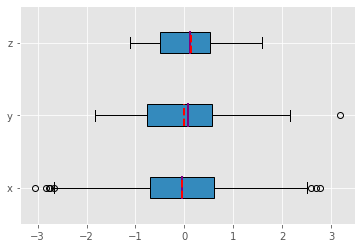

In [180]:
fig, ax = plt.subplots()

ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
          labels=('x', 'y', 'z'), patch_artist=True,
          medianprops={'linewidth':2, 'color' : 'purple'},
          meanprops={'linewidth':2, 'color' : 'red'})

plt.show()